<img src=https://i.postimg.cc/t4JfbjtD/image.png, width=600>

# 머니볼: 편견을 깨는 데이터의 힘

1. 배경: '머니볼'의 혁명

    1990년대 후반과 2000년대 초반, 메이저리그 베이스볼(MLB)은 거대 자본을 가진 구단들이 승리를 독식하는 구조였습니다. 뉴욕 양키스와 같은 부유한 구단들이 막대한 연봉으로 스타 플레이어들을 영입할 때, 가난한 구단인 **오클랜드 애슬레틱스**(Oakland Athletics)는 매년 주전 선수들을 잃고 하위권에 머무를 수밖에 없는 운명처럼 보였습니다.

    하지만 2002년, 오클랜드의 단장 **빌리 빈**(Billy Beane)은 100년 넘게 이어져 온 야구계의 관습에 도전장을 내밀었습니다. 그는 전통적인 스카우트들이 중요하게 여기던 외모, 타율, 도루와 같은 주관적이고 화려한 지표 대신, 승리에 직결되지만 저평가되어 있던 **출루율**(OBP)과 **장타율**(SLG)에 주목했습니다.

2. 데이터로 증명한 가난한 구단의 반란

    빌리 빈과 폴 데포데스타(Paul DePodesta)는 통계학적 접근법인 **'세이버메트릭스**(Sabermetrics)'를 도입했습니다. 그들은 "선수를 사는 것이 아니라 승리를 산다"는 철학 아래, 시장에서 저평가된 선수들을 헐값에 영입하여 팀을 재구성했습니다.

    그 결과, 오클랜드 애슬레틱스는 메이저리그 역사상 최다 연승 기록인 20연승이라는 기적을 일궈냈으며, 뉴욕 양키스보다 훨씬 적은 예산으로도 포스트시즌에 진출하며 야구라는 스포츠의 패러다임을 영원히 바꾸어 놓았습니다.

3. 분석의 목적

    본 노트북에서는 2000년대 전후의 MLB 데이터를 활용하여 빌리 빈의 전략을 검토 분석합니다:

- 승리의 공식: 어떤 지표(Run Scored, OBP, SLG 등)가 실제 팀의 승률과 가장 높은 상관관계를 갖는가?

- 저평가된 가치 발견: 전통적인 지표에 가려진 '진짜 가치'를 데이터 시각화와 통계 분석을 통해 찾아냅니다.

- "당신의 눈을 믿지 마라. 오직 데이터만이 진실을 말한다."

## 1. 데이터 프레임 불러오기

분석을 위해 2000~2023 시즌 MLB 팀별 타격 관련 통계 데이터를 불러옵니다.

In [1]:
# 코드 1. 메이저 리그 시즌 팀 성적 파일에서 데이터 프레임 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
url = 'https://github.com/panda-kim/book1/blob/main/27moneyball.xlsx?raw=true'
df = pd.read_excel(url)
df

,Season,Team,TG,PA,HR,R,SB,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,6373,236,864,93,9.5%,16.1%,0.280,0.352,0.472,0.824
1,2000,BAL,162,6238,184,794,126,8.9%,14.4%,0.272,0.341,0.435,0.776
2,2000,BOS,162,6371,167,792,43,9.6%,16.0%,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,6204,209,719,101,9.2%,21.4%,0.250,0.326,0.416,0.742
718,2023,SDP,162,6180,205,752,137,10.6%,21.2%,0.244,0.329,0.413,0.742
719,2023,SFG,162,6095,174,674,57,8.9%,24.5%,0.235,0.312,0.383,0.695


## 🔍 데이터 컬럼 정의 (Data Dictionary)

본 데이터셋은 2000년부터 2023년까지의 MLB 팀별 공격 지표를 담고 있으며, 각 열의 의미는 다음과 같습니다.

### 1. 기본 정보 및 경기량
* **Season**: 해당 경기 기록이 발생한 연도 (2000년~2023년)
* **Team**: 팀 명칭 (구단 약어)
* **TG (Total Games)**: 해당 시즌 팀이 치른 총 경기 수
* **PA (Plate Appearances)**: 타석 수 (타자가 타석에 들어선 총 횟수)

### 2. 득점 및 파워 지표
* **HR (Home Runs)**: 홈런 개수
* **R (Runs)**: 팀이 기록한 총 득점 (머니볼의 1차 목표 지표)

### 3. 선구안 및 정교함 지표
* **BB% (Walk Percentage)**: 타석당 볼넷 비율 (선구안의 핵심 지표)
* **K% (Strikeout Percentage)**: 타석당 삼진 비율

### 4. 비율 통계 지표 (공격의 질)
* **AVG (Batting Average)**: 타율 (안타 / 타수). 전통적으로 가장 중시되던 지표.
* **OBP (On-Base Percentage)**: 출루율 ((안타+볼넷+사구) / 타석). **머니볼의 핵심 지표**로 안타뿐만 아니라 볼넷을 통한 출루의 가치를 포함합니다.
* **SLG (Slugging Percentage)**: 장타율. 베이스 진루 가중치를 둔 지표.
* **OPS (On-Base Plus Slugging)**: 출루율 + 장타율. 현대 야구에서 타자의 종합적인 생산력을 평가하는 가장 대중적인 지표입니다.

## 2. 데이터 기본 정보 확인

In [2]:
# 코드 2. info 함수로 데이터 프레임 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  720 non-null    int64  
 1   Team    720 non-null    object 
 2   TG      720 non-null    int64  
 3   PA      720 non-null    int64  
 4   HR      720 non-null    int64  
 5   R       720 non-null    int64  
 6   SB      720 non-null    int64  
 7   BB%     720 non-null    object 
 8   K%      720 non-null    object 
 9   AVG     720 non-null    float64
 10  OBP     720 non-null    float64
 11  SLG     720 non-null    float64
 12  OPS     720 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 73.3+ KB


결측값을 확인해야 하지만, info 함수 적용 결과 Null이 없기에 생략한다.


In [3]:
# 코드 3. df의 columns 확인하기
df.columns

Index(['Season', 'Team', 'TG', 'PA', 'HR', 'R', 'SB', 'BB%', 'K%', 'AVG',
       'OBP', 'SLG', 'OPS'],
      dtype='object')

In [4]:
# 코드 4. df의 기술 통계 확인하기
df.describe()

,Season,TG,PA,HR,R,SB,AVG,OBP,SLG,OPS
count,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000
mean,2011.500,157.708,6029.094,171.403,719.451,89.294,0.257,0.325,0.415,0.740
std,6.927,20.418,804.285,41.415,122.748,32.311,0.013,0.015,0.027,0.040
...,...,...,...,...,...,...,...,...,...,...
50%,2011.500,162.000,6187.000,171.000,730.000,87.000,0.257,0.325,0.413,0.740
75%,2017.250,162.000,6271.500,199.250,790.000,110.000,0.267,0.336,0.433,0.767
max,2023.000,163.000,6537.000,307.000,978.000,200.000,0.294,0.367,0.501,0.851


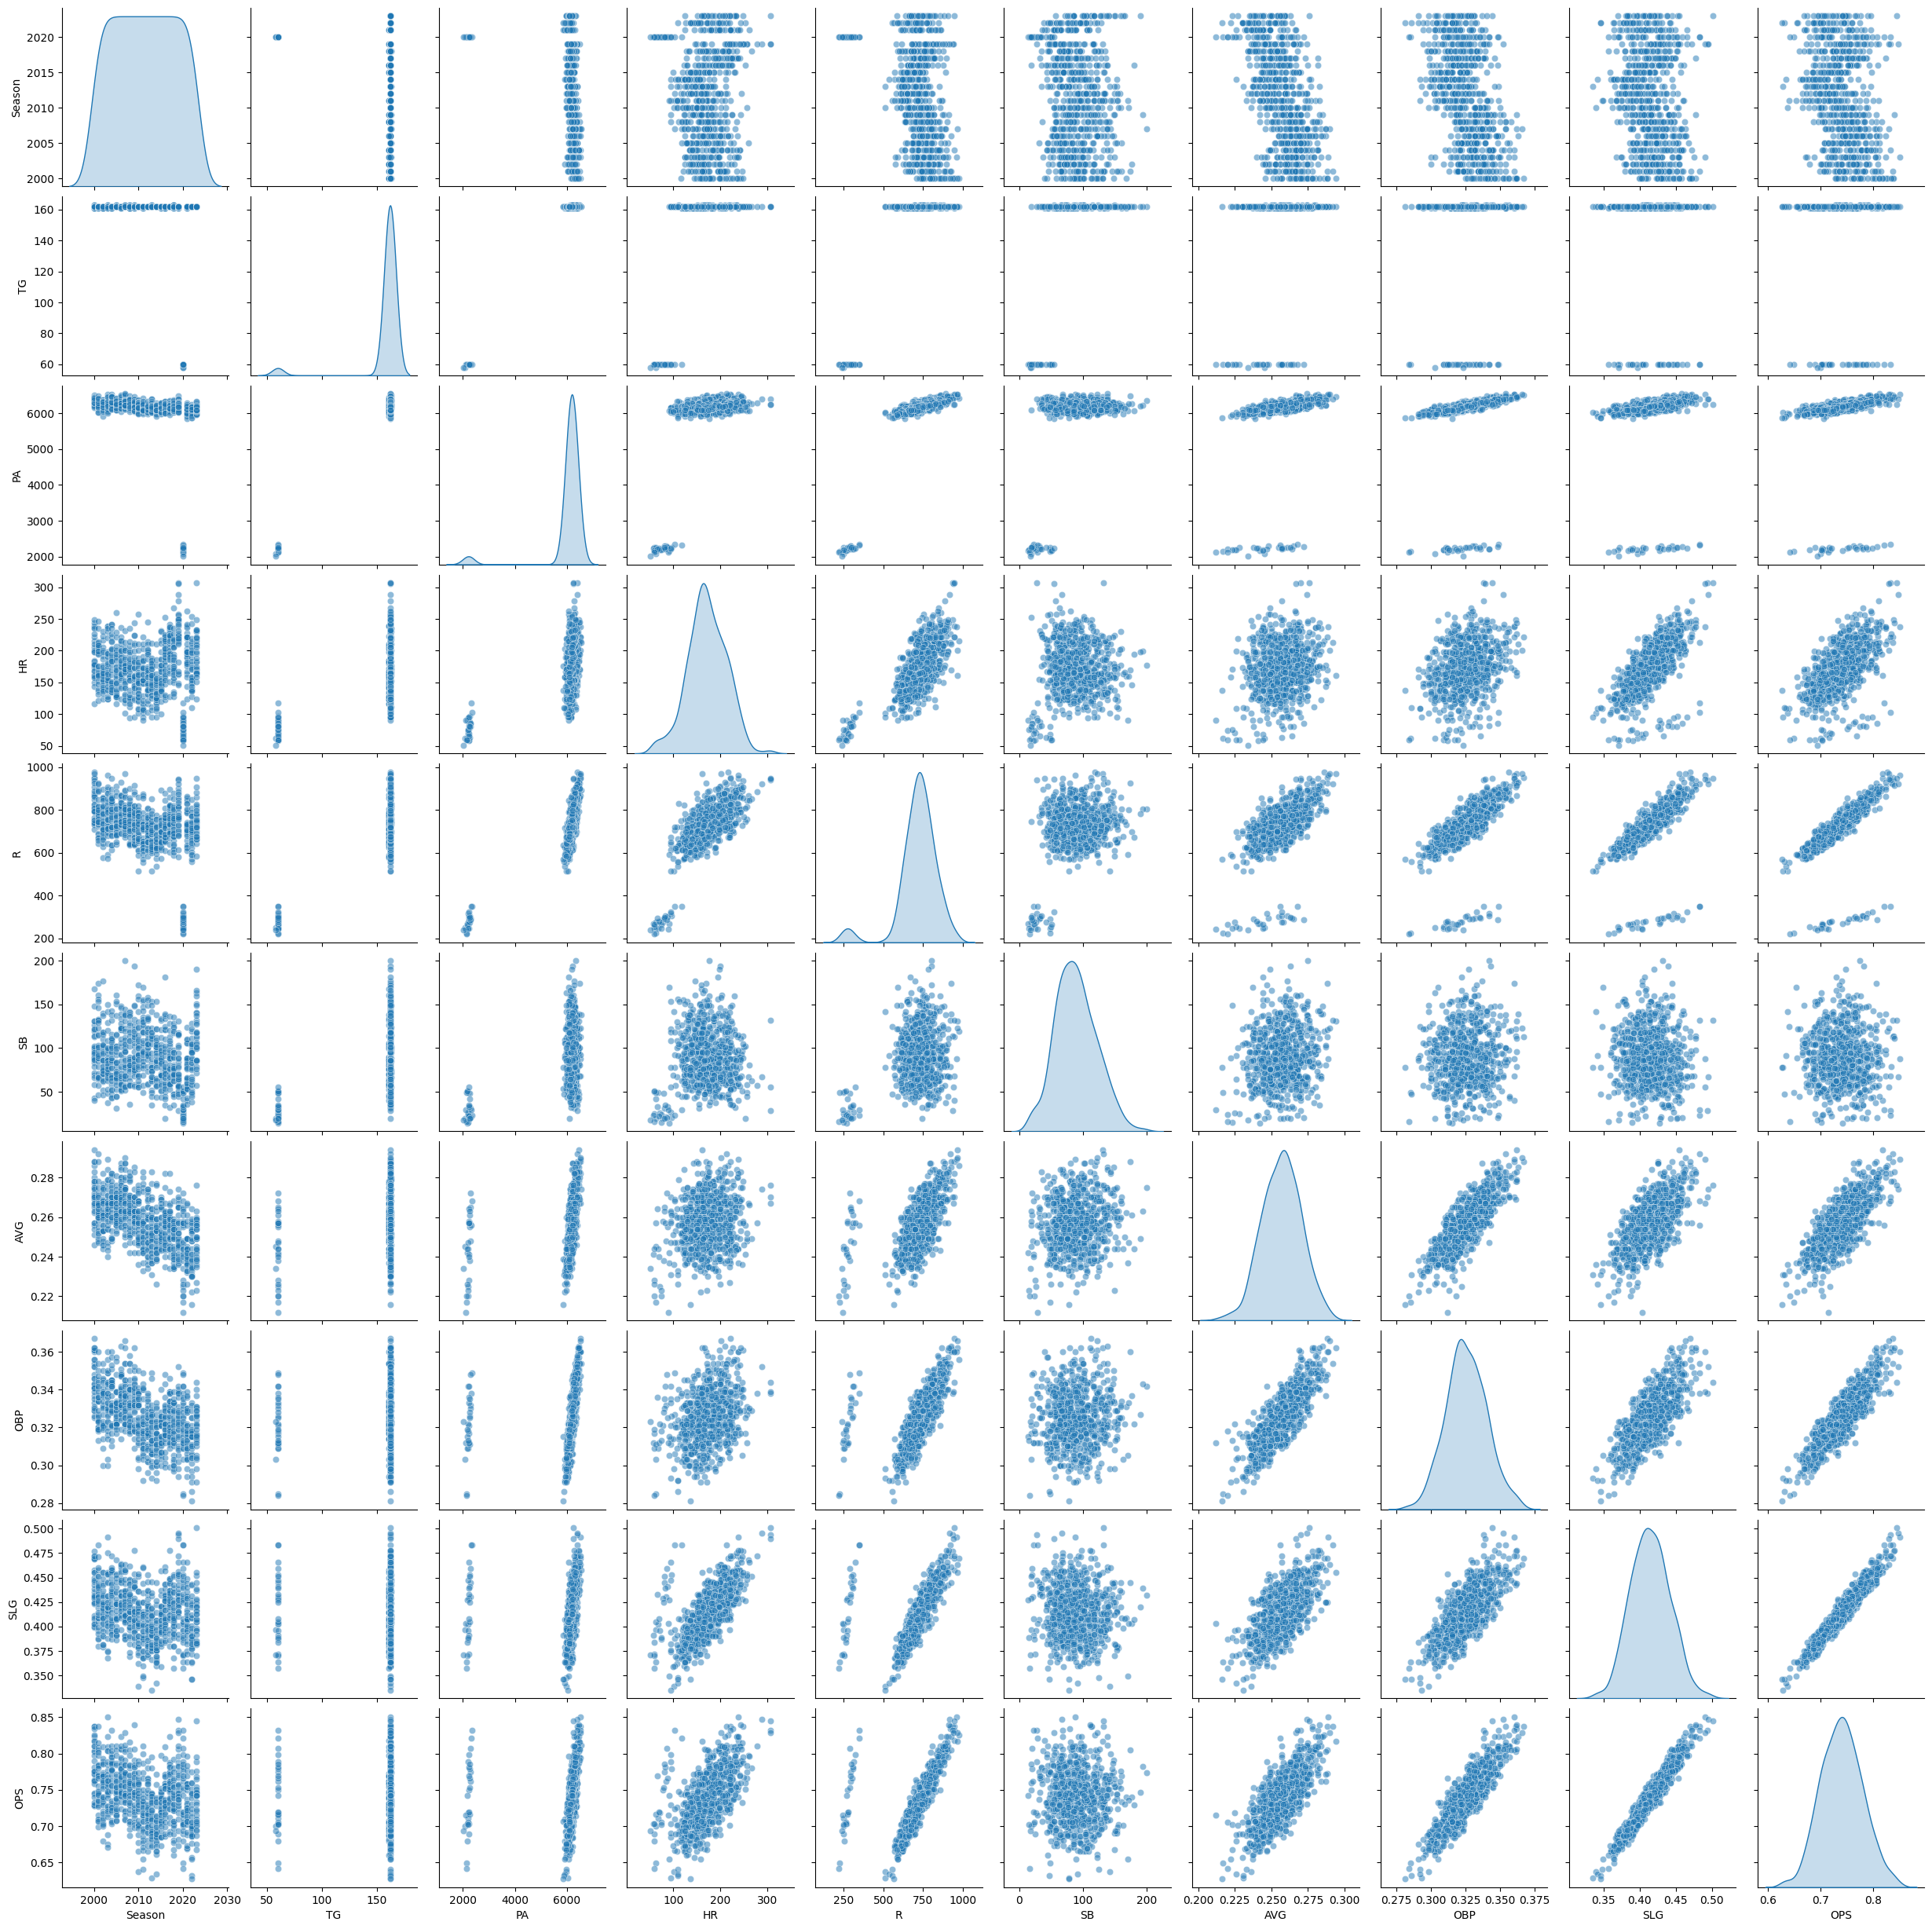

In [5]:
# 코드 5. pair plot 생성
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5})

<Axes: >

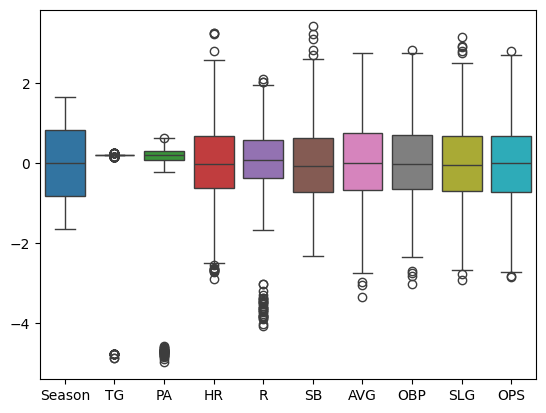

In [6]:
# 코드 6. 수치형 데이터를 표준화하여 박스 플롯 생성
# 수치형 데이터만 선택하여 표준화 (Z-score Scaling)
df_numeric = df.select_dtypes(include=['number'])
df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()

# 박스 플롯 생성
sns.boxplot(data=df_scaled)

In [7]:
# 코드 7. 메이저리그 팀 확인
print(df['Team'].unique())

df['Team'].nunique()

['ANA' 'BAL' 'BOS' 'CHW' 'CLE' 'DET' 'KCR' 'MIN' 'NYY' 'OAK' 'SEA' 'TBD'
 'TEX' 'TOR' 'ARI' 'ATL' 'CHC' 'CIN' 'COL' 'FLA' 'HOU' 'LAD' 'MIL' 'MON'
 'NYM' 'PHI' 'PIT' 'STL' 'SDP' 'SFG' 'LAA' 'WSN' 'TBR' 'MIA']


34

## 3. 데이터 전처리

In [8]:
# 코드 8. BB% 열과 K% 열의 퍼센트를 제거하고 수치형 데이터로 변환하기
df['BB%'] = df['BB%'].str.replace('%', '').astype('float').div(100)
df['K%'] = df['K%'].str.replace('%', '').astype('float').div(100)
df

,Season,Team,TG,PA,HR,R,SB,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,6373,236,864,93,0.095,0.161,0.280,0.352,0.472,0.824
1,2000,BAL,162,6238,184,794,126,0.089,0.144,0.272,0.341,0.435,0.776
2,2000,BOS,162,6371,167,792,43,0.096,0.160,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,6204,209,719,101,0.092,0.214,0.250,0.326,0.416,0.742
718,2023,SDP,162,6180,205,752,137,0.106,0.212,0.244,0.329,0.413,0.742
719,2023,SFG,162,6095,174,674,57,0.089,0.245,0.235,0.312,0.383,0.695


In [9]:
# 코드 9. PA, HR, R, SB 열을 경기당 평균 수치로 변경하기
# 변경할 열들을 변수 cols로 지정하기
cols = ['PA', 'HR', 'R', 'SB']

# cols 열의 수치를 경기 수(TG)로 나누기
df[cols] = df[cols].div(df['TG'], axis=0)

# cols 열의 이름에 '/G'를 추가하기
df = df.rename(lambda x: x + '/G' if x in cols else x, axis=1)
df

,Season,Team,TG,PA/G,HR/G,R/G,SB/G,BB%,K%,AVG,OBP,SLG,OPS
0,2000,ANA,162,39.340,1.457,5.333,0.574,0.095,0.161,0.280,0.352,0.472,0.824
1,2000,BAL,162,38.506,1.136,4.901,0.778,0.089,0.144,0.272,0.341,0.435,0.776
2,2000,BOS,162,39.327,1.031,4.889,0.265,0.096,0.160,0.267,0.341,0.423,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2023,STL,162,38.296,1.290,4.438,0.623,0.092,0.214,0.250,0.326,0.416,0.742
718,2023,SDP,162,38.148,1.265,4.642,0.846,0.106,0.212,0.244,0.329,0.413,0.742
719,2023,SFG,162,37.623,1.074,4.160,0.352,0.089,0.245,0.235,0.312,0.383,0.695


## 4. 상관관계 분석

In [10]:
# 코드 10. df에서 Season, Team, TG를 제외한 열들의 상관관계 구하기
df_corr = df.loc[:, 'PA/G':].corr()
df_corr

,PA/G,HR/G,R/G,SB/G,BB%,K%,AVG,OBP,SLG,OPS
PA/G,1.000,0.263,0.719,0.023,0.479,-0.512,0.723,0.833,0.624,0.739
HR/G,0.263,1.000,0.665,-0.166,0.416,0.255,0.122,0.350,0.793,0.676
R/G,0.719,0.665,1.000,0.011,0.520,-0.294,0.696,0.852,0.915,0.946
...,...,...,...,...,...,...,...,...,...,...
OBP,0.833,0.350,0.852,0.045,0.602,-0.545,0.828,1.000,0.758,0.893
SLG,0.624,0.793,0.915,-0.065,0.378,-0.221,0.674,0.758,1.000,0.970
OPS,0.739,0.676,0.946,-0.028,0.484,-0.354,0.772,0.893,0.970,1.000


In [11]:
# 코드 11. R/G 열(경기당 평균 득점)과 각 열의 상관관계 확인
pd.options.display.max_rows = None # 행 출력 옵션 리셋
s = df_corr['R/G'].drop('R/G').sort_values(ascending=False)
s

,R/G
OPS,0.946
SLG,0.915
OBP,0.852
PA/G,0.719
AVG,0.696
HR/G,0.665
BB%,0.520
SB/G,0.011
K%,-0.294


## 5. 시각화

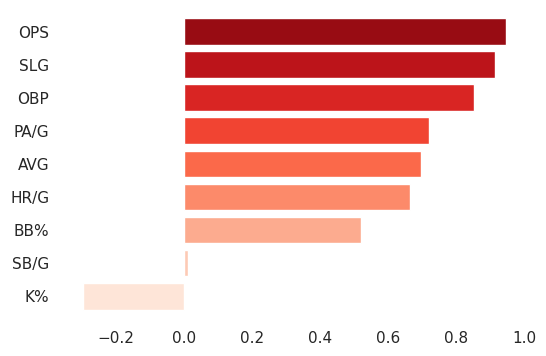

In [12]:
# 코드 16-12. R/G 열(경기당 평균 득점)과 상관 관계 그래프로 확인하기

# Reds 팔레트에서 색상 9개 추출하기
c = sns.color_palette('Reds', 9)

# seaborn 라이브러리의 테마 설정
sns.set_theme(style='white')

# s의 역순으로 수평 막대그래프 그리기
s[::-1].plot(kind='barh', color=c, figsize=(6, 4), width=.8)

# 축 테두리 제거
sns.despine(bottom=True, left=True)

<Axes: >

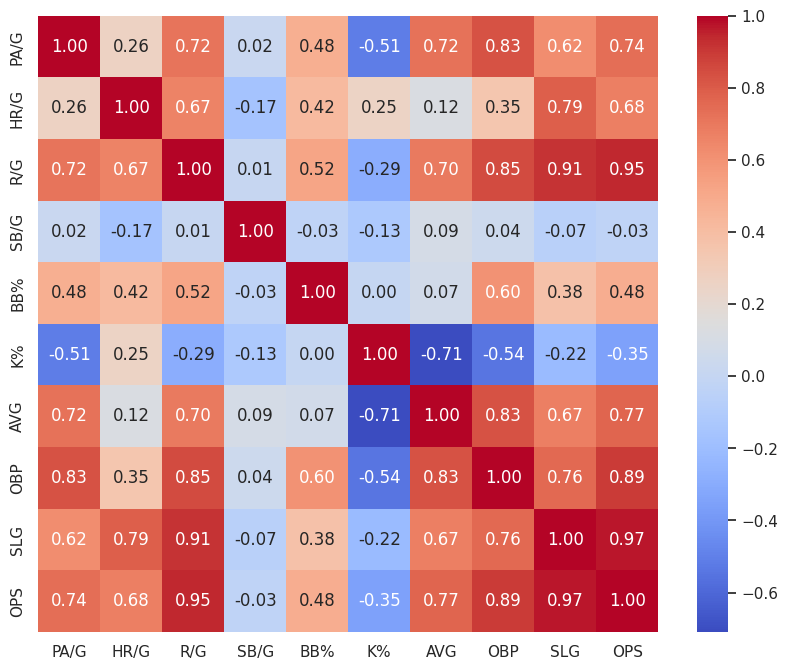

In [13]:
# 코드 13. df_corr의 상관 관계 히트맵 그래프로 표현하기
# seaborn의 테마와 그래프 크기 지정
sns.set_theme(style='white', rc={'figure.figsize': (10, 8)})

# df_corr으로 히트맵 그래프 그리기
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')

## 6. 결론

## 📊 히트맵 분석 결과: "머니볼 가설의 증명"

상관관계 히트맵은 '머니볼'의 핵심 가설을 증명하는 결정적인 데이터를 담고 있습니다. 득점($R/G$)과 여러 공격 지표 간의 관계를 분석한 결과, 빌리 빈이 왜 그토록 **출루율(OBP)**을 강조했는지 명확히 드러납니다.

### 1. 득점($R/G$)과의 상관관계: $OBP > AVG$
가장 주목해야 할 부분은 **득점**(R/G)과 주요 타격 지표들 간의 상관계수 비교입니다.
* **출루율**($OBP$): **0.85**로 매우 강력한 양의 상관관계를 보입니다.
* **타율**($AVG$): **0.70**으로 높지만, 출루율에 비해서는 낮습니다.
* **결론:** 전통적으로 중요하게 여겼던 타율보다 **출루율이 실제 득점을 생산하는 데 훨씬 더 기여도가 높음**을 시각적으로 확인할 수 있습니다.

### 2. $OPS$($0.95$)의 압도적 위력
득점($R/G$)과 가장 상관관계가 높은 지표는 **$OPS$(출루율 + 장타율)**로, 무려 **0.95**라는 수치를 기록했습니다.
* 이는 현대 야구에서 왜 $OPS$를 타자의 가장 중요한 생산력 지표로 보는지 설명해 줍니다.
* 특히 장타율($SLG$, 0.91) 역시 득점과 매우 밀접하며, 출루율과 장타율이 결합되었을 때 득점 예측력이 극대화됩니다.

### 3. 볼넷($BB\%$)의 가치
* **$BB$**%와 **$OBP$** 사이의 상관관계는 **0.60**으로 상당히 높습니다.
* 반면, **$BB$**%와 **$AVG$** 사이의 관계는 **0.07**로 거의 무관합니다.
* **결론:** 안타를 치지 못하더라도 볼넷을 골라 나가는 능력이 결국 출루율을 높이고, 이것이 높은 득점력으로 이어진다는 '머니볼'의 논리가 성립합니다.

### 4. 도루($SB/G$)와 삼진($K\%$)의 반전
* **도루($SB/G$):** 득점과의 상관관계가 **0.01**로 거의 없습니다. 과거 야구에서 중요시했던 기동력(도루)이 실제 팀의 득점 생산에는 유의미한 도움을 주지 못했음을 시사합니다.
* **삼진($K\%$):** 득점과 **-0.29**의 음의 상관관계를 보입니다. 삼진이 많을수록 득점이 줄어드는 경향은 있으나, 그 영향력이 출루율이나 장타율에 비해 현저히 낮다는 점이 흥미롭습니다.

---

### 💡 요약 및 인사이트
> **"타율($AVG$)에 현혹되지 마라. 승리를 원한다면 출루율($OBP$)과 장타율($SLG$)이 높은 선수를 모아야 한다."**
>
> 오늘의 분석은 오클랜드 애슬레틱스가 왜 시장에서 저평가된 '볼넷 잘 고르는 타자'들을 영입하여 승리를 거둘 수 있었는지 완벽하게 설명해 줍니다.